In [1]:
#Import required libraries i.e. numpy, pandas, seaborn,c etc.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read the csv file and show its first 5 rows.
cancer = pd.read_csv('cancer.csv')
cancer.head()

,id,thickness,cell_size,cell_shape,adhesion,epith_cell_size,nuclei,chromatin,nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
#Show its last 5 rows.
cancer.tail()

,id,thickness,cell_size,cell_shape,adhesion,epith_cell_size,nuclei,chromatin,nucleoli,mitoses,class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [4]:
#Get the info
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   thickness        699 non-null    int64 
 2   cell_size        699 non-null    int64 
 3   cell_shape       699 non-null    int64 
 4   adhesion         699 non-null    int64 
 5   epith_cell_size  699 non-null    int64 
 6   nuclei           699 non-null    object
 7   chromatin        699 non-null    int64 
 8   nucleoli         699 non-null    int64 
 9   mitoses          699 non-null    int64 
 10  class            699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [48]:
#Generate the value counts of the label "class" for cancer data
cancer['class'].value_counts()

class
2    458
4    241
Name: count, dtype: int64

In [6]:
#See the length of data
print("Length of cancer:", len(cancer))

Length of cancer: 699


In [7]:
#See the length of columns in data
num_columns = len(cancer.columns)
print("Total number of columns:", num_columns)

Total number of columns: 11


In [8]:
#Drop the column "id"
cancer = cancer.drop('id' , axis = 1)
cancer

,thickness,cell_size,cell_shape,adhesion,epith_cell_size,nuclei,chromatin,nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [9]:
#See if the data contains float and integer values
cancer.select_dtypes(exclude=[float,int]).columns

Index(['nuclei'], dtype='object')

In [10]:
#See which column contains "?" values
cancer.eq("?").sum()

thickness           0
cell_size           0
cell_shape          0
adhesion            0
epith_cell_size     0
nuclei             16
chromatin           0
nucleoli            0
mitoses             0
class               0
dtype: int64

In [11]:
#Generate it's value count
cancer['nuclei'].value_counts()

nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

In [12]:
#Apply exclude command to float and intergers present in data
cancer.select_dtypes(exclude=[float,int]).columns

Index(['nuclei'], dtype='object')

In [13]:
#Replace "?" present in data with 1
cancer.nuclei.replace("?" , 1 , inplace = True)

In [14]:
#See if now columns contains any "? values"
cancer.eq("?") . sum()

thickness          0
cell_size          0
cell_shape         0
adhesion           0
epith_cell_size    0
nuclei             0
chromatin          0
nucleoli           0
mitoses            0
class              0
dtype: int64

In [15]:
# Split the data into train set and test set. Train set will be 90% and test set will be 10% of the total data. 
# random_state ensures that the split is same if rerun the notebook
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(cancer, test_size=0.1, random_state=20)

In [16]:
# See the length of train and teat data
print("The length of train data is = ", len(train_data))
print("The length of test data is = ", len(test_data))

The length of train data is =  629
The length of test data is =  70


In [17]:
#Copy the orignal data in case you messed with it
cancer_train = train_data.copy()

In [18]:
#Describe the data using "include = 'all'" command
train_data.describe(include='all')

,thickness,cell_size,cell_shape,adhesion,epith_cell_size,nuclei,chromatin,nucleoli,mitoses,class
count,629.000000,629.000000,629.000000,629.000000,629.000000,629,629.000000,629.000000,629.000000,629.000000
unique,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,368,NaN,NaN,NaN,NaN
mean,4.373609,3.050874,3.154213,2.740859,3.151033,NaN,3.405405,2.799682,1.577107,2.658188
std,2.789654,3.011224,2.957243,2.800353,2.156553,NaN,2.416643,3.002854,1.710547,0.940516
min,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,6.000000,4.000000,5.000000,3.000000,4.000000,NaN,4.000000,3.000000,1.000000,4.000000


In [19]:
#Find the shape of train data
cancer_train.shape[1]

10

In [20]:
#See that summary statistics to desceibe data
summary_stats = cancer.describe()
print(summary_stats)

        thickness   cell_size  cell_shape    adhesion  epith_cell_size   
count  699.000000  699.000000  699.000000  699.000000       699.000000  \
mean     4.417740    3.134478    3.207439    2.806867         3.216023   
std      2.815741    3.051459    2.971913    2.855379         2.214300   
min      1.000000    1.000000    1.000000    1.000000         1.000000   
25%      2.000000    1.000000    1.000000    1.000000         2.000000   
50%      4.000000    1.000000    1.000000    1.000000         2.000000   
75%      6.000000    5.000000    5.000000    4.000000         4.000000   
max     10.000000   10.000000   10.000000   10.000000        10.000000   

        chromatin    nucleoli     mitoses       class  
count  699.000000  699.000000  699.000000  699.000000  
mean     3.437768    2.866953    1.589413    2.689557  
std      2.438364    3.053634    1.715078    0.951273  
min      1.000000    1.000000    1.000000    2.000000  
25%      2.000000    1.000000    1.000000    2.000000

In [21]:
#Describe train data
cancer_train.describe()

,thickness,cell_size,cell_shape,adhesion,epith_cell_size,chromatin,nucleoli,mitoses,class
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,4.373609,3.050874,3.154213,2.740859,3.151033,3.405405,2.799682,1.577107,2.658188
std,2.789654,3.011224,2.957243,2.800353,2.156553,2.416643,3.002854,1.710547,0.940516
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,4.000000,5.000000,3.000000,4.000000,4.000000,3.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [22]:
#See if the data contains null values
cancer.isnull().sum()

thickness          0
cell_size          0
cell_shape         0
adhesion           0
epith_cell_size    0
nuclei             0
chromatin          0
nucleoli           0
mitoses            0
class              0
dtype: int64

In [23]:
#Apply 'to_numeric' command to convert all strings to float vlaues
cancer_train = cancer_train.apply(pd.to_numeric, errors='coerce')

In [24]:
#Find the correlation of train data and then see it's correlation with 'class'
correlation = cancer_train.corr()
correlation ["class"]

thickness          0.704819
cell_size          0.813544
cell_shape         0.818786
adhesion           0.697265
epith_cell_size    0.673184
nuclei             0.825103
chromatin          0.763753
nucleoli           0.707555
mitoses            0.428652
class              1.000000
Name: class, dtype: float64

<Axes: >

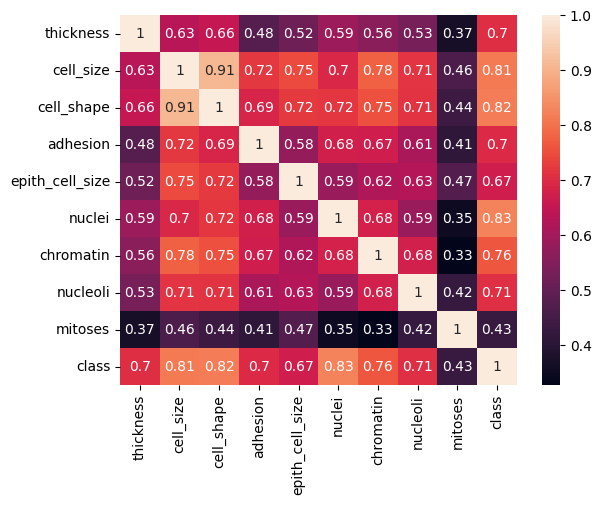

In [25]:
#See the heatmap of correlated train data
corr_matrix = cancer_train.corr()
sns.heatmap(corr_matrix, annot=True)

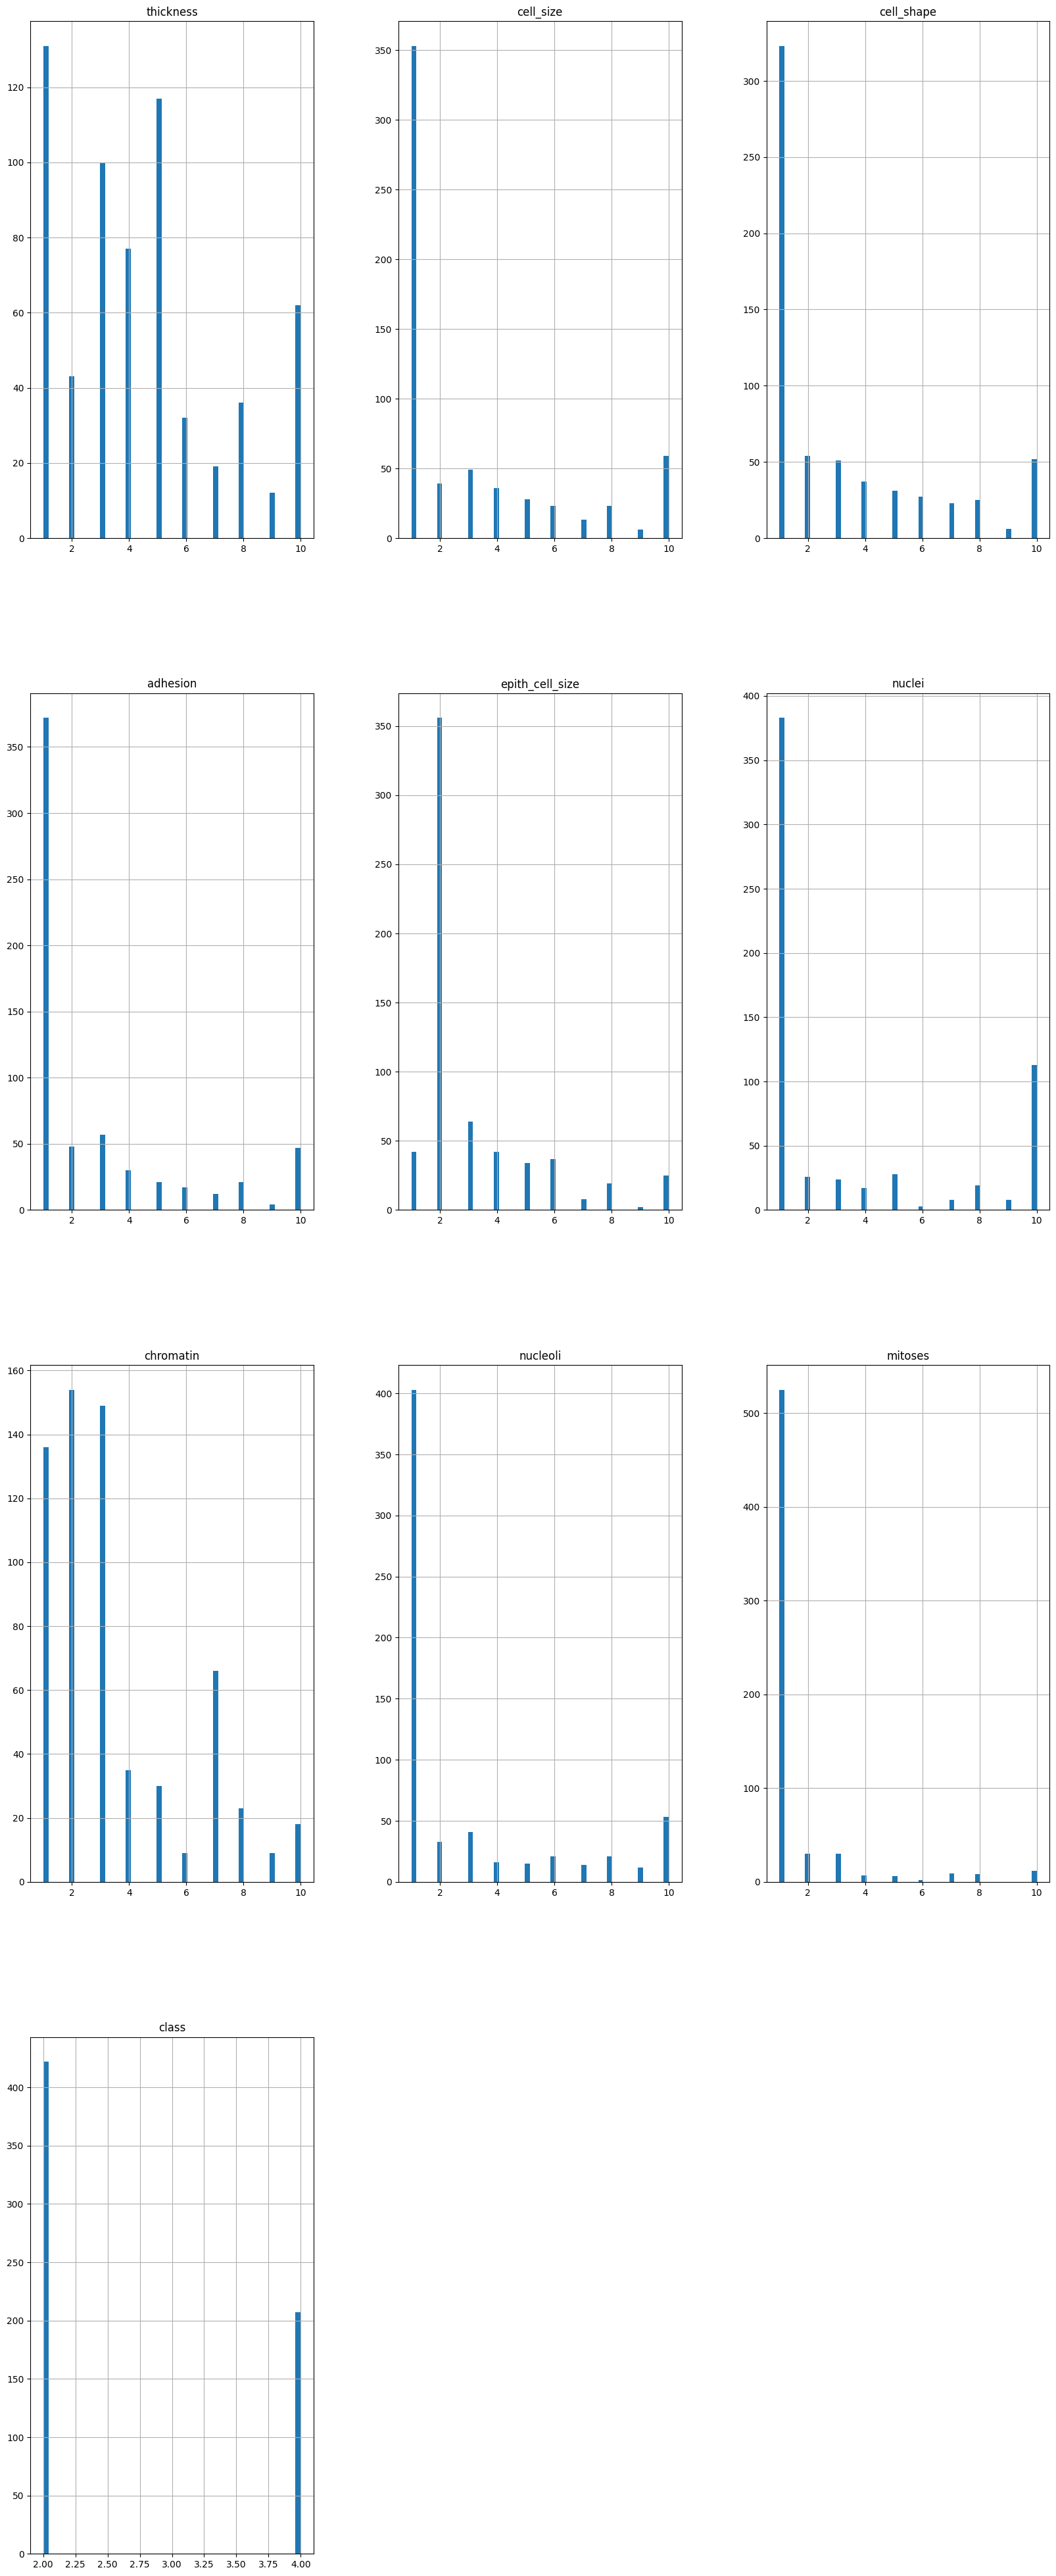

In [26]:
#See hist graph of all colmns with specified size
cancer_train.hist(bins = 50 , figsize= (20 , 50))
plt.show()

Text(0.5, 1.0, 'Classes of cancer')

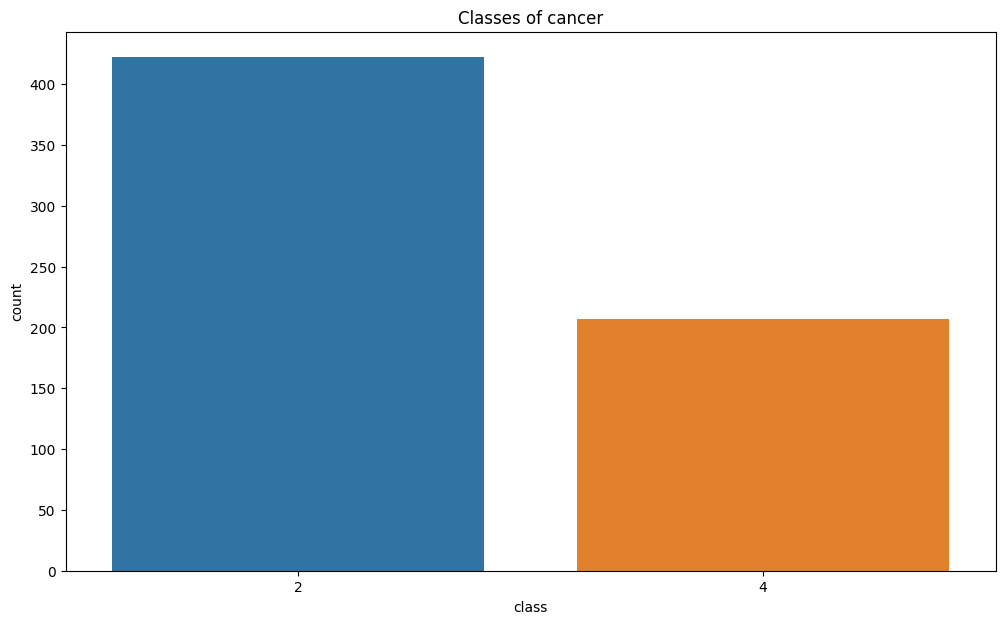

In [27]:
#See the countplot of train data with 'class' column
plt.figure(figsize=(12,7))
sns.countplot(data=cancer_train, x='class')
plt.title('Classes of cancer')

Text(0.5, 1.0, 'Number of class')

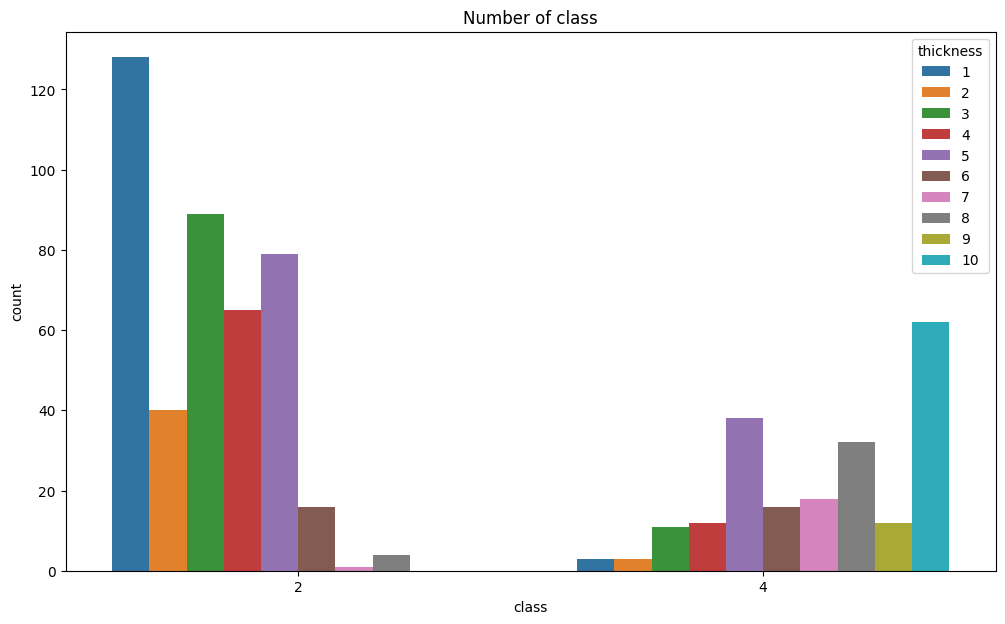

In [28]:
#find the countplot of 'class' with 'thickness'
plt.figure(figsize=(12,7))

sns.countplot(data=cancer_train, x='class', hue='thickness')
plt.title('Number of class')

<Axes: xlabel='cell_shape', ylabel='Count'>

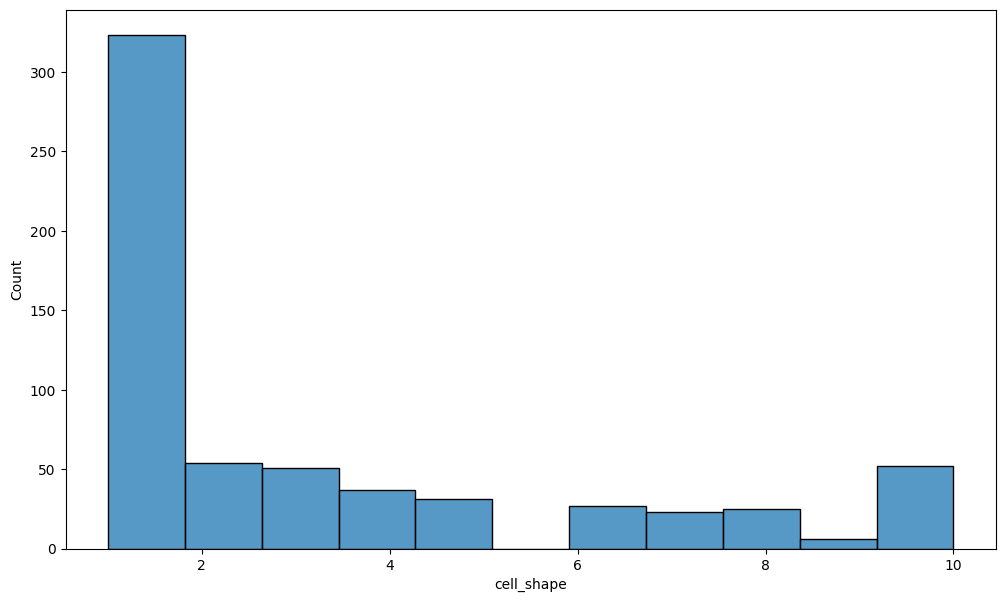

In [29]:
#Find the histplot of train data with 'cell_shape'
plt.figure(figsize=(12,7))

sns.histplot(data=cancer_train, x='cell_shape')

<Axes: xlabel='cell_shape', ylabel='Count'>

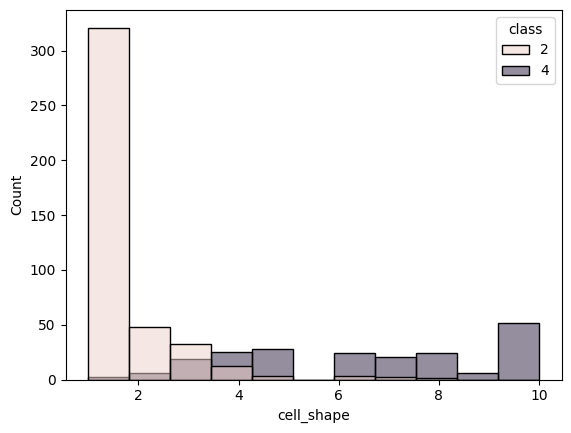

In [30]:
#find histplot of train data with 'class'
sns.histplot(data=cancer_train, x='cell_shape', hue='class')

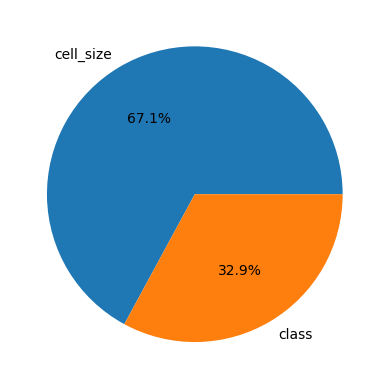

In [31]:
# See the pieplot of column 'class' with column 'cell_size'
counts = cancer_train['class'].value_counts()
labels = ['cell_size', 'class']
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()

In [32]:
#Drop certain values in train data of column 'class'
training_input_data = cancer_train.drop('class', axis=1)
training_label = cancer_train['class']
training_label

150    2
214    4
620    2
500    2
480    2
      ..
218    4
223    4
271    2
474    2
355    2
Name: class, Length: 629, dtype: int64

In [33]:
#Create pipeline and do scaling with MaxMinScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])
pipeline

Pipeline(steps=[('scaler', MinMaxScaler())])

In [34]:
#Fit training data in the pipeline
training_input_data_preprocessed = pipeline.fit_transform(training_input_data)

In [35]:
#Create logistic Regression model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model

LogisticRegression()

In [37]:
#Fit data in logistic model
log_model.fit(training_input_data_preprocessed, training_label)

LogisticRegression()

In [38]:
#See the score of model
score = log_model.score(training_input_data_preprocessed, training_label)
print(score)

0.9618441971383148


In [39]:
#Import warning library
import warnings
warnings.filterwarnings('ignore')

In [40]:
#Use cross validation to create log_scores for 10 subsets
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_model ,training_input_data_preprocessed,training_label,
                        scoring = 'neg_mean_squared_error' , cv = 10)
scores

array([-0.12698413, -0.38095238, -0.06349206, -0.12698413, -0.        ,
       -0.19047619, -0.19047619, -0.19047619, -0.12698413, -0.19354839])

In [41]:
#Determine mean of the log_scores
RMSE_scores = np.sqrt(-scores)
RMSE_scores.mean()

0.3687483369317564

In [42]:
#Use cross validation for training label predicted to create log_scores for 10 subsets
from sklearn.model_selection import cross_val_predict
training_labels_pred = cross_val_predict(log_model, training_input_data_preprocessed,
                                       training_label, cv=10)
training_labels_pred

array([2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2,
       2, 4, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 4,
       2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2,
       2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2,
       4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2,
       4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2,
       4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2,
       2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2,

In [43]:
# Determine the confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(training_label, training_labels_pred)

array([[412,  10],
       [ 15, 192]], dtype=int64)

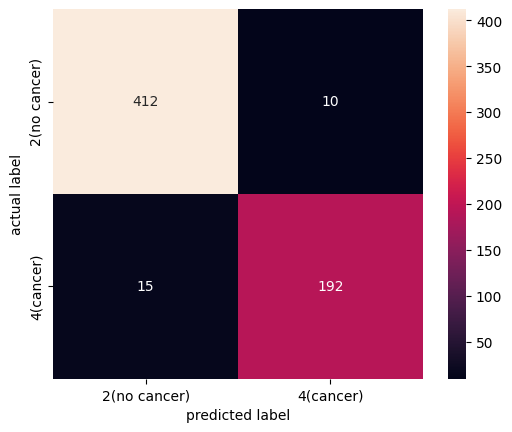

In [45]:
#Generate a heatmap of confusion_matrix
cm = confusion_matrix(training_label, training_labels_pred)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['2(no cancer)','4(cancer)'],
                        yticklabels=['2(no cancer)','4(cancer)'])
plt.ylabel('actual label')
plt.xlabel('predicted label');

In [46]:
#See accuracy score of model
from sklearn.metrics import accuracy_score

accuracy_score(training_label, training_labels_pred)

0.9602543720190779

In [47]:
#Determine the precision, recall and f1 score
from sklearn.metrics import classification_report

print(classification_report(training_label, training_labels_pred))

              precision    recall  f1-score   support

           2       0.96      0.98      0.97       422
           4       0.95      0.93      0.94       207

    accuracy                           0.96       629
   macro avg       0.96      0.95      0.95       629
weighted avg       0.96      0.96      0.96       629

